**▶ TASK-1 : TITANIC SURVIVAL PREDICTION**
* Author: Sabeel Ahmad
* Domain: Data Science
* Aim: To build a model that predict whether a passenger on the titanic survived or not.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import warnings
import seaborn as sns

*IMPORTING DATASET*

In [45]:
df = pd.read_csv("/content/drive/MyDrive/Codsoft/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Removing Null valuest**

In [48]:
id_to_name = df.set_index('PassengerId')['Name'].to_dict()

In [49]:
#deleting cabin column
df = df.drop(columns=['Cabin','SibSp' ,'Parch','Name','Ticket'])  # dropping name because ML model doesnot take strings
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,892,0,3,male,34.5,7.8292,Q
1,893,1,3,female,47.0,7.0000,S
2,894,0,2,male,62.0,9.6875,Q
3,895,0,3,male,27.0,8.6625,S
4,896,1,3,female,22.0,12.2875,S
...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,8.0500,S
414,1306,1,1,female,39.0,108.9000,C
415,1307,0,3,male,38.5,7.2500,S
416,1308,0,3,male,NaN,8.0500,S


In [50]:
# calculating the mean of a column
mean = df['Age'].mean()

#fill NaN values with the mean of the column
df.fillna(mean, inplace=True)

In [51]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,892,0,3,male,34.50000,7.8292,Q
1,893,1,3,female,47.00000,7.0000,S
2,894,0,2,male,62.00000,9.6875,Q
3,895,0,3,male,27.00000,8.6625,S
4,896,1,3,female,22.00000,12.2875,S
...,...,...,...,...,...,...,...
413,1305,0,3,male,30.27259,8.0500,S
414,1306,1,1,female,39.00000,108.9000,C
415,1307,0,3,male,38.50000,7.2500,S
416,1308,0,3,male,30.27259,8.0500,S


In [76]:
df.isna().sum()   # checking that is there any Null values

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

In [53]:
df1 = df['Survived']

In [54]:
df1     # 1:survived  0:not-survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [55]:
# converting to binary data
df_1 = pd.get_dummies(df['Sex'])
print(df_1)

     female  male
0         0     1
1         1     0
2         0     1
3         0     1
4         1     0
..      ...   ...
413       0     1
414       1     0
415       0     1
416       0     1
417       0     1

[418 rows x 2 columns]


**DATA VISUALIZATION**

<Axes: xlabel='Survived', ylabel='count'>

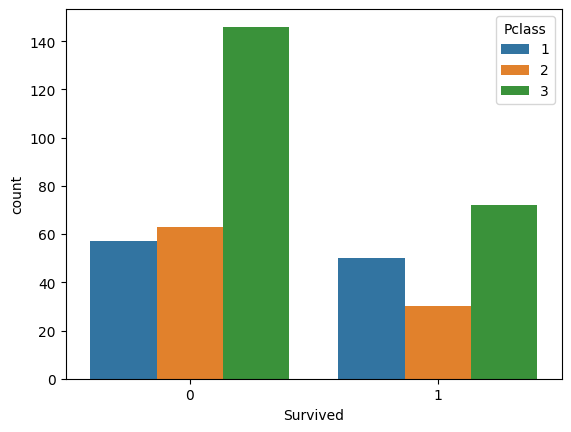

In [56]:
#Lets visualize the count of Survivals wrt pclass
sns.countplot(x=df['Survived'], hue=df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

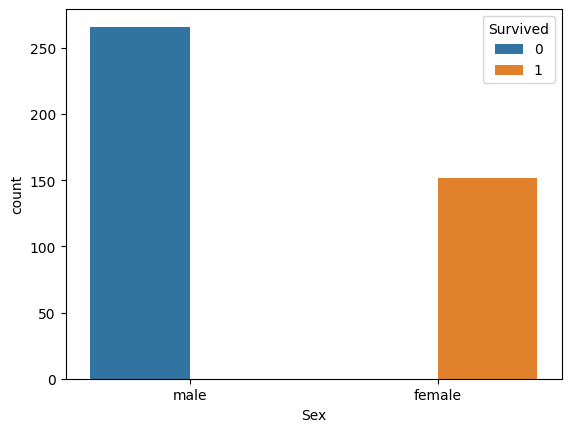

In [57]:
#Lets visualize the count of survivals wrt Gender
sns.countplot(x = df['Sex'], hue=df['Survived'])

In [58]:
 #joining 2 binary columns
df_2 = pd.concat((df_1, df), axis=1)

df_2 = df_2.drop(["Sex"], axis=1)
df_2 = df_2.drop(["male"], axis=1)
df2 = df_2.rename(columns={"female": "Sex"})

df2

,Sex,PassengerId,Survived,Pclass,Age,Fare,Embarked
0,0,892,0,3,34.50000,7.8292,Q
1,1,893,1,3,47.00000,7.0000,S
2,0,894,0,2,62.00000,9.6875,Q
3,0,895,0,3,27.00000,8.6625,S
4,1,896,1,3,22.00000,12.2875,S
...,...,...,...,...,...,...,...
413,0,1305,0,3,30.27259,8.0500,S
414,1,1306,1,1,39.00000,108.9000,C
415,0,1307,0,3,38.50000,7.2500,S
416,0,1308,0,3,30.27259,8.0500,S


<Axes: xlabel='Sex', ylabel='count'>

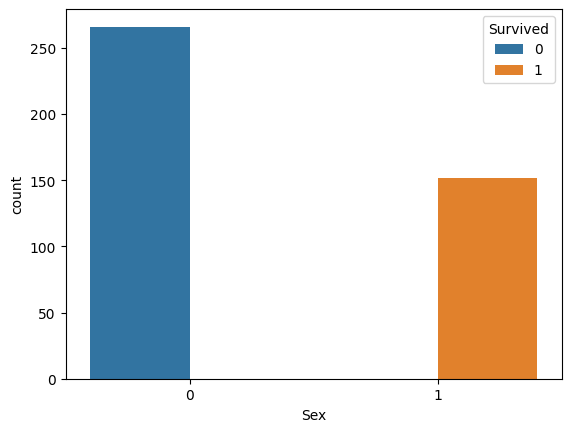

In [59]:
#Lets visualize the count of survivals wrt Gender
sns.countplot(x = df2['Sex'], hue=df['Survived'])

In [60]:
#df2['Embarked'].unique()
#array(['Q', 'S', 'C'], dtype=object)
embark ={"Q":1,"S":2,"C":3}
df2["Embarked"]=df2["Embarked"].map(embark)
df2

,Sex,PassengerId,Survived,Pclass,Age,Fare,Embarked
0,0,892,0,3,34.50000,7.8292,1
1,1,893,1,3,47.00000,7.0000,2
2,0,894,0,2,62.00000,9.6875,1
3,0,895,0,3,27.00000,8.6625,2
4,1,896,1,3,22.00000,12.2875,2
...,...,...,...,...,...,...,...
413,0,1305,0,3,30.27259,8.0500,2
414,1,1306,1,1,39.00000,108.9000,3
415,0,1307,0,3,38.50000,7.2500,2
416,0,1308,0,3,30.27259,8.0500,2


In [61]:
df3 = df2[['Age', 'Survived','Fare']].astype('int')
 # converting Age and Survived into int

In [62]:
df3

,Age,Survived,Fare
0,34,0,7
1,47,1,7
2,62,0,9
3,27,0,8
4,22,1,12
...,...,...,...
413,30,0,8
414,39,1,108
415,38,0,7
416,30,0,8


In [63]:
ddf = df2.drop(["Age" , "Survived","Fare"],axis=1)  #dropping original Age and Survived column and replacing it with Int Age and survived column
cdf = pd.concat((ddf, df3), axis=1)
cdf

,Sex,PassengerId,Pclass,Embarked,Age,Survived,Fare
0,0,892,3,1,34,0,7
1,1,893,3,2,47,1,7
2,0,894,2,1,62,0,9
3,0,895,3,2,27,0,8
4,1,896,3,2,22,1,12
...,...,...,...,...,...,...,...
413,0,1305,3,2,30,0,8
414,1,1306,1,3,39,1,108
415,0,1307,3,2,38,0,7
416,0,1308,3,2,30,0,8


***Checking for dulpicates***

In [64]:
duplicate_values = cdf['PassengerId'].duplicated().count()
duplicate_values

# hence no duplicate ids

418

***MODEL TRAINING***

In [65]:
#cdf.to_numpy()

In [66]:
col_s=cdf["Survived"]

In [67]:
col_s = col_s.astype(str)
col_s= col_s.replace({'0': 0, '1': 1}).astype(int)
y = col_s
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [68]:
X = cdf.drop("Survived", axis = 1)
y = cdf["Survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (418, 6)
Shape of y =  (418,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .55)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (229, 6)
Shape of y_train =  (229,)
Shape of X_test =  (189, 6)
Shape of y_test =  (189,)


***MODEL PREDICTION***

In [70]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

pred=clf.predict(X_test)
print (pred)
clf.score(X_test,y_test)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0]


1.0

In [71]:
print ("Accuracy : " , accuracy_score(y_test,pred)*100)
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)

Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        83

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

F1 Score :  100.0


**Checking Model Predicting Correctly or Not**

In [77]:
#ignoring the warning
warnings.filterwarnings("ignore", category=UserWarning)


# Prompt the user for input
inputs = {}
name_id = None

#labels
lst = ["Sex", "PassengerId", "Pclass","Embarked","Age","Fare"]

# Loop over user input
for inp in lst:
    user_in = input(f"Enter {inp}: ")
    inputs[inp] = user_in

    if inp == "PassengerId":  #saving the input corresponding to the passengerid

        name_id = int(user_in)

    else:

        inputs[inp] = user_in


#input into 1D array
user_in_array = np.array(list(inputs.values()))

#reshape from 1D to 2D array
user_in_array = user_in_array.reshape(1, -1)

# Use the trained model to make predictions
prediction = clf.predict(user_in_array)

matching_name = id_to_name.get(name_id)

# Print the prediction result
if prediction == 0:
    if matching_name:
        print(f"ID {name_id} -> Name: {matching_name}")
    else:
        print(f"No matching name found for ID {target_id}")

    print("Sorry. Did not Survive")
else:
    if matching_name:
        print(f"ID {name_id} -> Name: {matching_name}")
    else:
        print(f"No matching name found for ID {target_id}")

    print("Survived")

Enter Sex: 1
Enter PassengerId: 893
Enter Pclass: 3
Enter Embarked: 2
Enter Age: 47
Enter Fare: 7
ID 893 -> Name: Wilkes, Mrs. James (Ellen Needs)
Survived


In [ ]:
cdf

,Sex,PassengerId,Pclass,Embarked,Age,Survived,Fare
0,0,892,3,1,34,0,7
1,1,893,3,2,47,1,7
2,0,894,2,1,62,0,9
3,0,895,3,2,27,0,8
4,1,896,3,2,22,1,12
...,...,...,...,...,...,...,...
413,0,1305,3,2,30,0,8
414,1,1306,1,3,39,1,108
415,0,1307,3,2,38,0,7
416,0,1308,3,2,30,0,8
